In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

In [76]:
df = pd.read_csv('creditcard.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286799 entries, 0 to 286798
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    286799 non-null  float64
 1   V1      286799 non-null  float64
 2   V2      286799 non-null  float64
 3   V3      286799 non-null  float64
 4   V4      286799 non-null  float64
 5   V5      286799 non-null  float64
 6   V6      286799 non-null  float64
 7   V7      286799 non-null  float64
 8   V8      286799 non-null  float64
 9   V9      286799 non-null  float64
 10  V10     286799 non-null  float64
 11  V11     286799 non-null  float64
 12  V12     286799 non-null  float64
 13  V13     286799 non-null  object 
 14  V14     286799 non-null  float64
 15  V15     286799 non-null  float64
 16  V16     286799 non-null  float64
 17  V17     286799 non-null  float64
 18  V18     286799 non-null  float64
 19  V19     286799 non-null  float64
 20  V20     286798 non-null  float64
 21  V21     28

In [77]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,286799.000000,286799.000000,286799.000000,286799.000000,286799.000000,286799.000000,286799.000000,286799.000000,286799.000000,286799.000000,...,286798.000000,286798.000000,286798.000000,286798.000000,286798.000000,286798.000000,286798.000000,286798.000000,286798.000000,286797.000000
mean,94243.166047,-0.000065,0.001546,0.006489,0.003048,-0.000907,0.000226,-0.001761,-0.000306,0.009621,...,-0.000316,-0.000675,-0.000182,0.000027,0.000567,0.003197,-0.000254,0.000209,88.105389,0.001761
std,47812.537601,1.956406,1.649815,1.517409,1.416225,1.379385,1.331590,1.236461,1.192639,1.103701,...,0.734570,0.724535,0.623620,0.605346,0.520749,0.484632,0.403900,0.337421,249.523037,0.041925
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,53547.000000,-0.920085,-0.594748,-0.882354,-0.845786,-0.691297,-0.766846,-0.554525,-0.208107,-0.638577,...,-0.228638,-0.541264,-0.161750,-0.354170,-0.316300,-0.326229,-0.071365,-0.052783,5.690000,0.000000
50%,84298.000000,0.018895,0.065428,0.187941,-0.015505,-0.056748,-0.273073,0.037807,0.022156,-0.045122,...,-0.030334,0.006303,-0.011544,0.041029,0.018184,-0.049882,0.001021,0.011172,21.990000,0.000000
75%,139114.000000,1.312179,0.802826,1.031831,0.745237,0.609429,0.398199,0.568090,0.325933,0.611189,...,0.185183,0.525675,0.147033,0.438701,0.350741,0.245025,0.090738,0.078171,76.890000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,39.000000,25691.160000,1.000000


In [78]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))


In [79]:
X = df.drop('Class', axis=1)
y = df['Class']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
np.random.seed(42)
new_data_shuffle = df.sample(frac  = 1).reset_index(drop = True)
new_data_shuffle

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,62087.0,-1.761132,-1.522630,0.707951,-2.142551,-0.078297,-1.302335,-0.548271,0.369808,-3.118730,...,-0.229889,-1.209098,0.221615,-0.082810,-0.072061,-0.682588,-0.056873,-0.181463,0.059612,0.0
1,131280.0,-2.454642,1.986230,-1.596021,-2.535165,-0.587222,-0.552170,-0.631038,1.883626,0.481413,...,0.176959,0.359252,-0.059131,0.323572,0.166885,0.756866,0.097456,0.123788,-0.337065,0.0
2,77225.0,1.311902,-0.100906,-0.339024,-0.257188,0.262914,0.144955,-0.089460,-0.011645,0.298674,...,-0.037881,-0.084639,-0.205436,-1.240512,0.481565,1.185257,-0.075182,-0.013478,-0.256912,0.0
3,52895.0,0.945188,-0.161562,0.077331,1.223166,-0.119195,-0.152357,0.222284,-0.066296,0.011139,...,0.157650,0.216092,-0.245853,-0.266231,0.593020,-0.243549,0.006867,0.039190,0.226010,0.0
4,84618.0,1.227972,0.290306,-0.977410,1.328668,2.344768,3.711465,-0.422063,0.861834,-0.867723,...,0.006161,-0.173933,-0.115275,1.001202,0.715902,0.082211,-0.011168,0.016084,-0.292620,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286794,74855.0,-1.042375,1.112448,0.702174,0.104372,0.311634,-0.676081,1.178216,-0.900361,1.281274,...,-0.496634,-0.203020,0.394552,0.246368,-1.280515,-0.151445,-0.099571,-0.457334,-0.263004,0.0
286795,158045.0,-3.530613,-2.880360,2.481951,0.303782,0.106191,1.596043,-0.652413,-0.071532,1.058366,...,-0.667016,0.202019,-0.576249,0.250360,0.568988,-0.511195,-1.255015,-0.177786,0.127823,0.0
286796,79246.0,-0.870406,0.395682,2.512015,0.582012,-0.239203,0.870924,0.327970,0.479709,0.380066,...,-0.233686,-0.388956,0.017076,0.202422,-0.031357,-0.702907,0.145719,0.114555,-0.148305,0.0
286797,86450.0,-0.221767,0.832356,0.031382,-0.808350,0.413307,-0.667643,0.799536,0.061556,0.160312,...,-0.281406,-0.674052,0.070838,-0.392667,-0.476089,0.151782,0.343168,0.137736,-0.317107,0.0


In [82]:
train, test, val = new_data_shuffle[:240000], new_data_shuffle[240000: 262000], new_data_shuffle[262000:]
train['Class'].value_counts(), test['Class'].value_counts(), val['Class'].value_counts()

(Class
 0.0    239565
 1.0       433
 Name: count, dtype: int64,
 Class
 0.0    21969
 1.0       31
 Name: count, dtype: int64,
 Class
 0.0    24758
 1.0       41
 Name: count, dtype: int64)

In [83]:
df['Class'].value_counts()

Class
0.0    286292
1.0       505
Name: count, dtype: int64

In [84]:
normal=df[df.Class == 0]
fraud =df[df.Class == 1]
print(normal.shape)
print(fraud.shape)

(286292, 31)
(505, 31)


In [85]:
normal_sample=normal.sample(n=492)
print (normal_sample.shape)

(492, 31)


In [86]:
new_df=pd.concat([normal_sample, fraud], axis=0)
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
28045,33890.0,-0.462069,0.498969,1.157272,1.404380,0.408407,-0.233738,0.516289,0.008269,-1.036985,...,0.255295,0.588990,-0.004416,0.027937,-0.249439,-0.169581,0.154810,0.163320,-0.080976,0.0
89071,61528.0,-1.467087,0.557101,0.232924,0.940665,-0.118840,0.716947,0.978568,0.292545,-0.203825,...,0.062272,0.866800,0.407072,-0.291889,-0.489773,-0.312960,-0.024393,-0.079253,0.271337,0.0
220546,141360.0,-0.766017,1.621623,-1.058402,-1.102612,0.969068,-1.808967,1.619676,-0.439791,-0.278349,...,0.241741,1.032818,-0.164632,0.128370,-0.226095,0.038439,-0.030340,0.026907,-0.350932,0.0
223585,142626.0,-1.183902,0.372823,0.856017,0.297052,0.891277,0.346042,0.646651,-0.229089,1.310047,...,-0.550794,-0.807033,0.168649,0.605157,-1.269575,-1.403526,-0.153188,0.055765,-0.206055,0.0
103696,67921.0,-1.977039,-0.151101,0.797514,1.168077,0.394696,-1.157335,0.730747,-0.188256,0.070900,...,-0.061150,0.471854,0.817304,0.354719,0.074014,-0.295241,0.228309,0.649570,-0.140891,0.0


In [87]:
new_df['Class'].value_counts()

Class
1.0    505
0.0    492
Name: count, dtype: int64

In [88]:
X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']

In [89]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
28045,33890.0,-0.462069,0.498969,1.157272,1.404380,0.408407,-0.233738,0.516289,0.008269,-1.036985,...,0.386175,0.255295,0.588990,-0.004416,0.027937,-0.249439,-0.169581,0.154810,0.163320,-0.080976
89071,61528.0,-1.467087,0.557101,0.232924,0.940665,-0.118840,0.716947,0.978568,0.292545,-0.203825,...,-0.482624,0.062272,0.866800,0.407072,-0.291889,-0.489773,-0.312960,-0.024393,-0.079253,0.271337
220546,141360.0,-0.766017,1.621623,-1.058402,-1.102612,0.969068,-1.808967,1.619676,-0.439791,-0.278349,...,0.015488,0.241741,1.032818,-0.164632,0.128370,-0.226095,0.038439,-0.030340,0.026907,-0.350932
223585,142626.0,-1.183902,0.372823,0.856017,0.297052,0.891277,0.346042,0.646651,-0.229089,1.310047,...,-0.252083,-0.550794,-0.807033,0.168649,0.605157,-1.269575,-1.403526,-0.153188,0.055765,-0.206055
103696,67921.0,-1.977039,-0.151101,0.797514,1.168077,0.394696,-1.157335,0.730747,-0.188256,0.070900,...,-0.180313,-0.061150,0.471854,0.817304,0.354719,0.074014,-0.295241,0.228309,0.649570,-0.140891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281855,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.209889
282135,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350050
282141,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.040940
283136,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.628779


In [90]:
print(Y)

28045     0.0
89071     0.0
220546    0.0
223585    0.0
103696    0.0
         ... 
281855    1.0
282135    1.0
282141    1.0
283136    1.0
283666    1.0
Name: Class, Length: 997, dtype: float64


In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(997, 30) (797, 30) (200, 30)


In [92]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [93]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [94]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9121706398996235


In [95]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [96]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.92


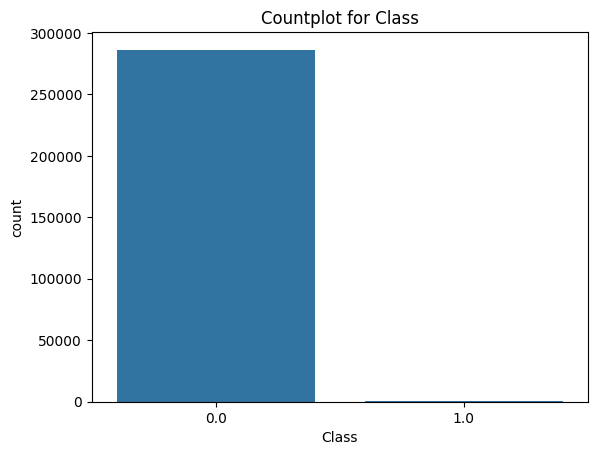

In [99]:
sns.countplot(df,x= "Class")
plt.title("Countplot for Class")
plt.show()